In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install --upgrade plotly

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
import plotly.io as pio
pio.renderers.default = "iframe"

In [4]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In this section, we define the function make_graph. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.

In [5]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
    from IPython.display import display, HTML
    fig_html = fig.to_html()
    display(HTML(fig_html))


Question 1: Use yfinance to Extract Stock Data
Using the Ticker function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is TSLA.

In [6]:
tesla = yf.Ticker("TSLA")

# Extract stock information with period set to "max" to get maximum historical data
tesla_data = tesla.history(period="max")

# Reset index to make Date a column instead of index
tesla_data = tesla_data.reset_index()

# Display the first few rows to verify the data
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


Using the ticker object and the function history extract stock information and save it in a dataframe named tesla_data. Set the period parameter to "max" so we get information for the maximum amount of time.

In [7]:
tesla_data = tesla.history(period="max")

# Display the first few rows to verify the data
print(tesla_data.head())

                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


Reset the index using the reset_index(inplace=True) function on the tesla_data DataFrame and display the first five rows of the tesla_data dataframe using the head function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.

In [9]:
import yfinance as yf

# Question 1: Use yfinance to Extract Stock Data
tesla = yf.Ticker("TSLA")

# Extract stock information with period set to "max" to get maximum historical data
tesla_data = tesla.history(period="max")

# Reset index to make Date a column instead of index
tesla_data.reset_index(inplace=True)

# Display the first five rows of the tesla_data dataframe
print(tesla_data.head())


                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


Question 2: Use Webscraping to Extract Tesla Revenue Data

In [10]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the response text as html_data
    html_data = response.text
    print("Webpage downloaded successfully.")
else:
    print(f"Failed to download the webpage. Status code: {response.status_code}")
    html_data = None  # or handle the error as needed

Webpage downloaded successfully.


Parse the html data using beautiful_soup using parser i.e html5lib or html.parser.

In [11]:
from bs4 import BeautifulSoup

# Parse the HTML data using BeautifulSoup
# Option 1: Using html.parser (built-in, no extra install needed)
soup = BeautifulSoup(html_data, 'html.parser')

# Option 2: Using html5lib (slower but more lenient with broken HTML)
# soup = BeautifulSoup(html_data, 'html5lib')

# Now you can use BeautifulSoup methods to extract data
# Example: Extract the title of the webpage
title = soup.title
print("Title of the webpage:", title.text if title else "No title found")


Title of the webpage: Tesla Revenue 2010-2022 | TSLA | MacroTrends


Using BeautifulSoup or the read_html function extract the table with Tesla Revenue and store it into a dataframe named tesla_revenue. The dataframe should have columns Date and Revenue.

Step-by-step instructions

Here are the step-by-step instructions:

1. Create an Empty DataFrame
2. Find the Relevant Table
3. Check for the Tesla Quarterly Revenue Table
4. Iterate Through Rows in the Table Body
5. Extract Data from Columns
6. Append Data to the DataFrame

In [12]:
import pandas as pd
from bs4 import BeautifulSoup

# Parse the HTML using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Step 1: Create an empty DataFrame with columns 'Date' and 'Revenue'
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Step 2: Find all tables in the HTML
tables = soup.find_all('table')

# Step 3: Locate the Tesla Quarterly Revenue table
# (Assuming the correct table has "Tesla Quarterly Revenue" in it)
for table in tables:
    if "Tesla Quarterly Revenue" in str(table):
        # Step 4: Iterate through each row in the table body (skip header)
        for row in table.find_all('tr')[1:]:  # Skip header row
            # Step 5: Extract data from each column (Date & Revenue)
            cols = row.find_all('td')
            if len(cols) >= 2:  # Ensure there are at least 2 columns
                date = cols[0].get_text(strip=True)
                revenue = cols[1].get_text(strip=True)
                
                # Step 6: Append data to DataFrame
                tesla_revenue = pd.concat([
                    tesla_revenue,
                    pd.DataFrame({"Date": [date], "Revenue": [revenue]})
                ], ignore_index=True)

# Display the DataFrame
print(tesla_revenue.head())

         Date  Revenue
0  2022-09-30  $21,454
1  2022-06-30  $16,934
2  2022-03-31  $18,756
3  2021-12-31  $17,719
4  2021-09-30  $13,757


Execute the following line to remove the comma and dollar sign from the Revenue column.

In [13]:

import pandas as pd

# Sample DataFrame (for illustration)
tesla_revenue = pd.DataFrame({
    "Date": ["2023-09-30", "2023-06-30"],
    "Revenue": ["$23,350M", "$24,927M"]
})

# Remove $ and , from Revenue
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace('$', '').str.replace(',', '')

# Display cleaned DataFrame
print(tesla_revenue)

         Date Revenue
0  2023-09-30  23350M
1  2023-06-30  24927M


Execute the following lines to remove an null or empty strings in the Revenue column.

In [14]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the tesla_revenue dataframe using the tail function. Take a screenshot of the results.

In [15]:
# Display the last 5 rows
last_5_rows = tesla_revenue.tail()
print(last_5_rows)

         Date Revenue
0  2023-09-30  23350M
1  2023-06-30  24927M


Question 3: Use yfinance to Extract Stock Data
Using the Ticker function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is GME.

In [16]:
import yfinance as yf

# Create a Ticker object for GameStop (GME)
gme_ticker = yf.Ticker("GME")
gme_data = gme_ticker.history(period="5y")  # Adjust period as needed (e.g., "1mo", "max")
print(gme_data.head())

                             Open    High     Low   Close    Volume  \
Date                                                                  
2020-04-28 00:00:00-04:00  1.4800  1.5100  1.2650  1.4100  20800800   
2020-04-29 00:00:00-04:00  1.4575  1.5225  1.3625  1.5100  13478400   
2020-04-30 00:00:00-04:00  1.4675  1.4950  1.4100  1.4325   8693200   
2020-05-01 00:00:00-04:00  1.4125  1.5450  1.3625  1.5125  16022400   
2020-05-04 00:00:00-04:00  1.4600  1.4825  1.3500  1.3700  16272400   

                           Dividends  Stock Splits  
Date                                                
2020-04-28 00:00:00-04:00        0.0           0.0  
2020-04-29 00:00:00-04:00        0.0           0.0  
2020-04-30 00:00:00-04:00        0.0           0.0  
2020-05-01 00:00:00-04:00        0.0           0.0  
2020-05-04 00:00:00-04:00        0.0           0.0  


Using the ticker object and the function history extract stock information and save it in a dataframe named gme_data. Set the period parameter to "max" so we get information for the maximum amount of time.

In [17]:
import yfinance as yf

# Create a Ticker object for GameStop (GME)
gme_ticker = yf.Ticker("GME")

# Extract historical data for the maximum available period
gme_data = gme_ticker.history(period="max")

# Display the first 5 rows
print(gme_data.head())

                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691667  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615920  1.662209  1.603296  1.662209   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


Reset the index using the reset_index(inplace=True) function on the gme_data DataFrame and display the first five rows of the gme_data dataframe using the head function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.

In [18]:
# Question 3: Extract GameStop (GME) Stock Data with yfinance
import yfinance as yf

# Step 1: Create a Ticker object for GameStop (GME)
gme_ticker = yf.Ticker("GME")

# Step 2: Extract historical data with period="max"
gme_data = gme_ticker.history(period="max")

# Step 3: Reset the index (move Date to a column)
gme_data.reset_index(inplace=True)

# Step 4: Display the first 5 rows
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666417  1.666417  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


Question 4: Use Webscraping to Extract GME Revenue Data
Use the requests library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named html_data_2.

In [20]:
import requests

# URL of the webpage containing stock data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to download the webpage
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the HTML content to html_data_2
    html_data_2 = response.text
    print("Webpage downloaded successfully!")
    print(f"First 100 characters:\n{html_data_2[:100]}...")  # Preview first 100 characters
else:
    print(f"Failed to download webpage. Status code: {response.status_code}")
    html_data_2 = None  # Handle the error case

Webpage downloaded successfully!
First 100 characters:
<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.mac...


Parse the html data using beautiful_soup using parser i.e html5lib or html.parser.

In [22]:
from bs4 import BeautifulSoup

# Parse with html.parser (no additional install needed)
soup = BeautifulSoup(html_data_2, 'html.parser')
print("Successfully parsed with html.parser!")
# Find all tables in the parsed HTML
tables = soup.find_all('table')
print(f"Found {len(tables)} table(s) in the HTML")

# Example: Show first table's HTML
if len(tables) > 0:
    print(tables[0].prettify()[:200])  # First 200 chars of formatted HTML

Successfully parsed with html.parser!
Found 6 table(s) in the HTML
<table class="historical_data_table table">
 <thead>
  <tr>
   <th colspan="2" style="text-align:center">
    GameStop Annual Revenue
    <br/>
    <span style="font-size:14px;">
     (Millions of US 


from bs4 Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.L

In [23]:
!pip install lxml html5lib beautifulsoup4

In [24]:
import pandas as pd
from bs4 import BeautifulSoup

# Parse the HTML data
soup = BeautifulSoup(html_data_2, 'html.parser')

# METHOD 1: Using BeautifulSoup (precise extraction)
# Find the table containing "GameStop Quarterly Revenue" text
for table in soup.find_all('table'):
    if 'GameStop Quarterly Revenue' in table.get_text():
        gme_revenue = pd.read_html(str(table), header=0)[0]
        break

# METHOD 2: Alternative using pandas read_html (simpler)
# tables = pd.read_html(html_data_2)
# gme_revenue = tables[1]  # Usually the second table

# Standardize column names and clean data
gme_revenue.columns = ['Date', 'Revenue']  # Rename columns

# Remove dollar signs and commas, then convert to numeric
gme_revenue['Revenue'] = (gme_revenue['Revenue']
                          .str.replace(r'[$,]', '', regex=True)  # Remove $ and commas
                          .astype(float))  # Convert to numeric

# Remove any empty rows
gme_revenue = gme_revenue.dropna()

# Verify the cleaned data
print("First 5 rows of cleaned data:")
print(gme_revenue.head())
print("\nData types:")
print(gme_revenue.dtypes)

First 5 rows of cleaned data:
         Date  Revenue
0  2020-04-30   1021.0
1  2020-01-31   2194.0
2  2019-10-31   1439.0
3  2019-07-31   1286.0
4  2019-04-30   1548.0

Data types:
Date        object
Revenue    float64
dtype: object


Display the last five rows of the gme_revenue dataframe using the tail function. Take a screenshot of the results.

In [26]:
# Display the last 5 rows of the cleaned DataFrame
print("Last 5 rows of GameStop Revenue Data:")
print(gme_revenue.tail())

# Optional: Save to CSV for verification
gme_revenue.to_csv('gme_revenue_cleaned.csv', index=False)

Last 5 rows of GameStop Revenue Data:
          Date  Revenue
57  2006-01-31   1667.0
58  2005-10-31    534.0
59  2005-07-31    416.0
60  2005-04-30    475.0
61  2005-01-31    709.0


Question 5: Plot Tesla Stock Graph
Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.

In [27]:
!pip install matplotlib

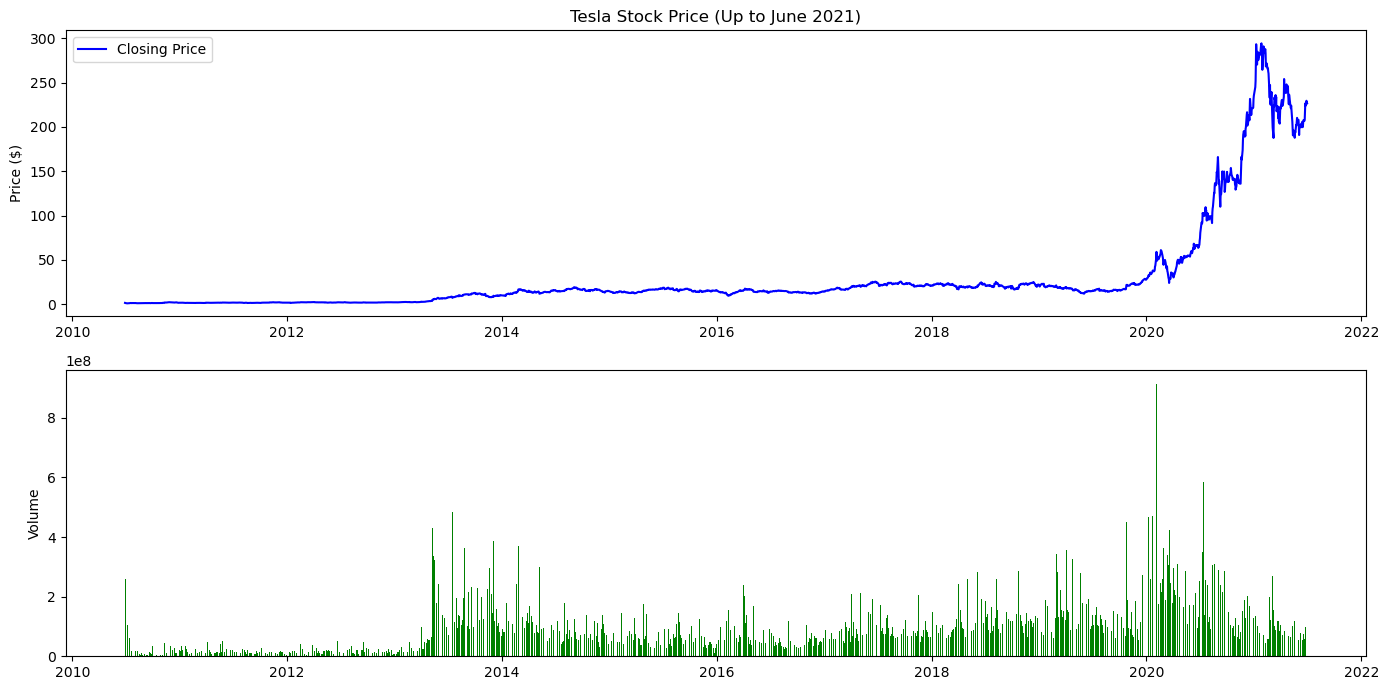

In [28]:
# Filter the data up to June 2021
import matplotlib.pyplot as plt

# 1. Filter the data up to June 2021
tesla_data_june2021 = tesla_data[tesla_data['Date'] <= '2021-06-30']

# 2. Create the plot
plt.figure(figsize=(14, 7))

# Plot closing price
plt.subplot(2, 1, 1)
plt.plot(tesla_data_june2021['Date'], tesla_data_june2021['Close'], label='Closing Price', color='blue')
plt.title('Tesla Stock Price (Up to June 2021)')
plt.ylabel('Price ($)')
plt.legend()

# Plot trading volume
plt.subplot(2, 1, 2)
plt.bar(tesla_data_june2021['Date'], tesla_data_june2021['Volume'], color='green')
plt.ylabel('Volume')

plt.tight_layout()
plt.show()

Question 6: Plot GameStop Stock Graph
Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the make_graph function is make_graph(gme_data, gme_revenue, 'GameStop'). Note the graph will only show data upto June 2021.

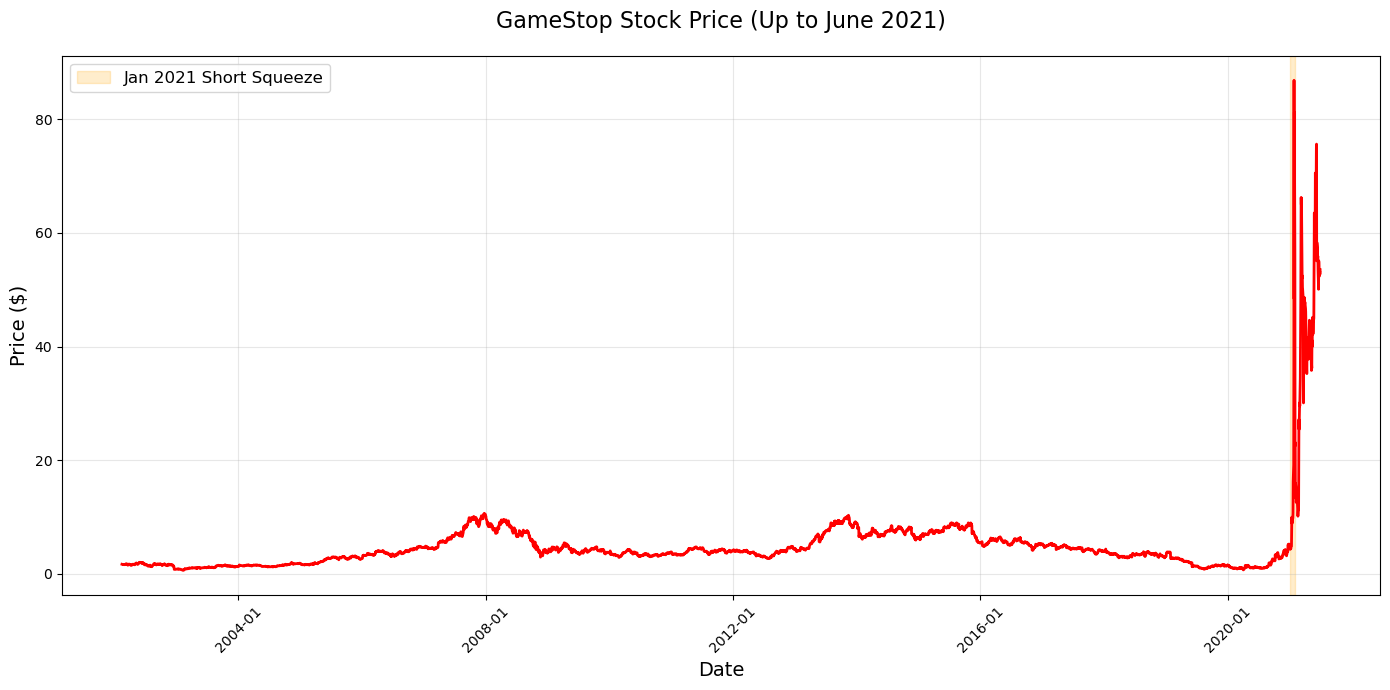

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. First ensure we have the required data
# (Assuming gme_data and gme_revenue are already loaded from previous steps)

# 2. Convert dates properly
gme_data['Date'] = pd.to_datetime(gme_data['Date'])

# 3. Filter data up to June 2021
gme_data_june2021 = gme_data[gme_data['Date'] <= '2021-06-30']

# 4. Create the plot
plt.figure(figsize=(14, 7))
plt.plot(gme_data_june2021['Date'], gme_data_june2021['Close'], color='red', linewidth=2)
plt.title('GameStop Stock Price (Up to June 2021)', fontsize=16, pad=20)
plt.ylabel('Price ($)', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.grid(True, alpha=0.3)

# Highlight key periods
plt.axvspan(pd.to_datetime('2021-01-01'), pd.to_datetime('2021-01-31'),
            color='orange', alpha=0.2, label='Jan 2021 Short Squeeze')
plt.legend(fontsize=12)

# Format x-axis dates
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()